# Teaching Kids: Frequency Distribution and Law of Large Numbers
- Roll two dice and add their results
- Demonstrate [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) by simulating over multiple runs
- Demonstrate convergence to [expected value](https://en.wikipedia.org/wiki/Expected_value)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from collections import Counter

In [2]:
def roll_fair_dice():
    """ Roll a fair six-sided dice with values 1-6 """
    return random.sample([1,2,3,4,5,6],1)[0]

In [3]:
def add_two_dice(times):
    """
    Roll two six-sided fair dice 'times' times and 
    add their values.
    Return frequencies of the sum of the rolls as mapping
    {sum: frequency}
    """
    
    tracker = Counter()
    for _ in range(times):
        add = roll_fair_dice() + roll_fair_dice()
        tracker[add] += 1
    return tracker

### Run Simulations
Let's roll two dice 10<sup>x</sup> times where x={1..6}. Track frequency of the sums of two rolls

In [4]:
possible_sums = [x for x in range(2,13)]
simulation_times = [10**(x+1) for x in range(6)]
results = [add_two_dice(sim) for sim in simulation_times]

In [5]:
assert(len(results) == 6)

### Plot Results
Plot histogram with sum of two dice rolls on x-axis and frequency on y-axis

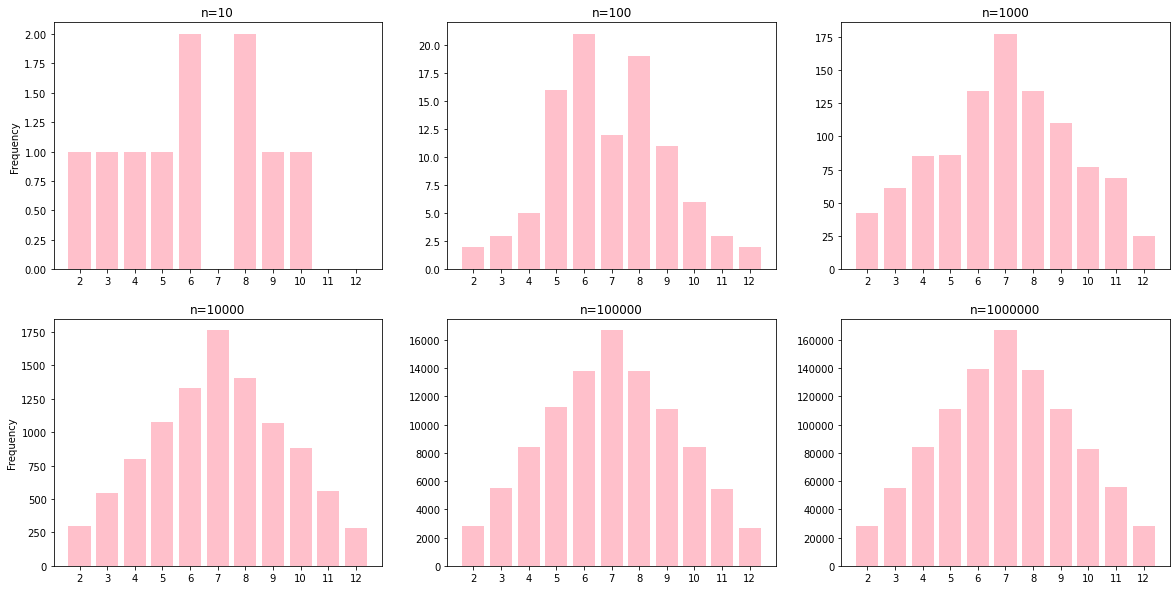

In [6]:
# Plot results in 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(20,10))

for x in range(2):
    for y in range(3):
        axs[x][y].bar(possible_sums, [results[(x*3)+y][p] for p in possible_sums], facecolor='pink')
        axs[x][y].set_xticks(possible_sums)
        axs[x][y].set_title("n={0}".format(simulation_times[(x*3)+y]))
        
        if y == 0:
            axs[x][y].set_ylabel("Frequency")

## Converging to Expected Value
The [expected value](https://en.wikipedia.org/wiki/Expected_value) of the sum of rolling two fair six-sided dice is 7 (it is 3.5 for one such dice). If we were to roll two dice sufficient number of times, we will observe that the sum will start converging to 7. 

In this exercise, we will simulate rolling two dice from 1 to 1000 times tracking rolling average per roll.

### Number of times  we want to roll two dice

In [11]:
roll_times = 1000

### Compute rolling average for every roll

In [15]:
previous_mean = 0
means = []
for i in range(roll_times):
    # Roll two dice
    add = roll_fair_dice() + roll_fair_dice()
    # Compute rolling average for this roll
    previous_mean = (add + previous_mean*(i))/(i+1)
    means.append(previous_mean)

### What is the mean value after simulating 10k times?

In [16]:
print(means[-1])

7.0169999999999995


### Plot rolling mean for all rolls

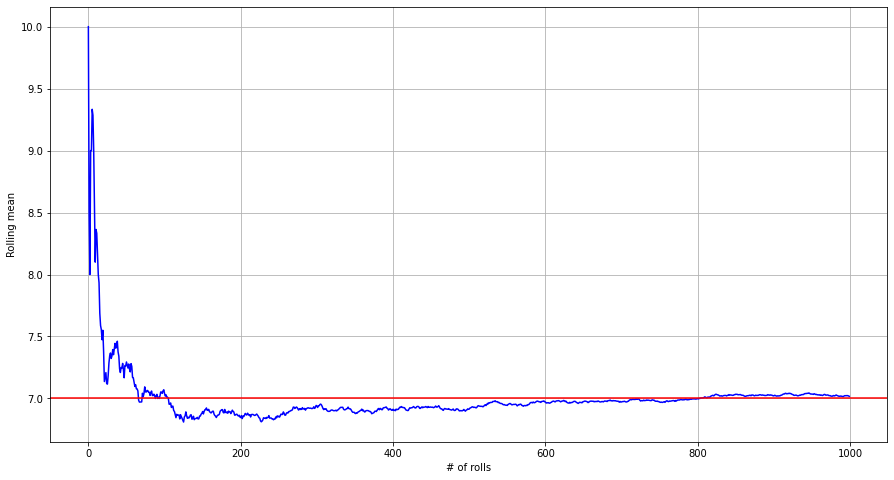

In [17]:
plt.figure(figsize=(15,8))
line, = plt.plot(range(roll_times), means, color='b')
plt.xlabel("# of rolls")
plt.ylabel("Rolling mean")
# Draw a horizontal line at expected value of 7.0
plt.axhline(7.0, color='red', label='Expected Value')
plt.grid(True)